# Foreign Exchange Rates by Rajat Bhardwaj

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

In [2]:
dataset=pd.read_csv('C://Python37//FER.csv')

In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Date'])

In [4]:
from datetime import datetime
indexedDataset.head(5)

,Value
Date,
1973-12-31,7.6541
1974-12-31,8.0289
1975-12-31,8.4086
1976-12-31,8.9715
1977-12-31,8.7683


C:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


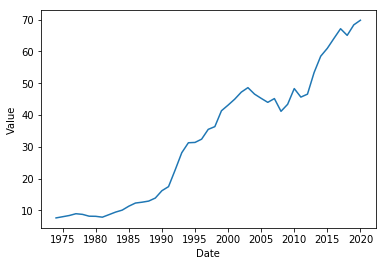

In [5]:
plt.xlabel("Date")
plt.ylabel("Value")
plt.plot(indexedDataset)

In [6]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
rolmean,rolstd

(                Value
 Date                 
 1973-12-31        NaN
 1974-12-31        NaN
 1975-12-31        NaN
 1976-12-31        NaN
 1977-12-31        NaN
 1978-12-31        NaN
 1979-12-31        NaN
 1980-12-31        NaN
 1981-12-31        NaN
 1982-12-31        NaN
 1983-12-31        NaN
 1984-12-31   8.807375
 1985-12-31   9.197183
 1986-12-31   9.577833
 1987-12-31   9.956025
 1988-12-31  10.366692
 1989-12-31  10.987092
 1990-12-31  11.761617
 1991-12-31  12.974550
 1992-12-31  14.663633
 1993-12-31  16.547833
 1994-12-31  18.373600
 1995-12-31  20.233100
 1996-12-31  22.246392
 1997-12-31  24.249117
 1998-12-31  26.645733
 1999-12-31  29.160775
 2000-12-31  31.752275
 2001-12-31  34.336183
 2002-12-31  36.930642
 2003-12-31  38.920575
 2004-12-31  40.346008
 2005-12-31  41.405100
 2006-12-31  42.554450
 2007-12-31  43.284392
 2008-12-31  43.941050
 2009-12-31  44.938375
 2010-12-31  45.296258
 2011-12-31  45.583825
 2012-12-31  46.281892
 2013-12-31  47.223133
 2014-12-31

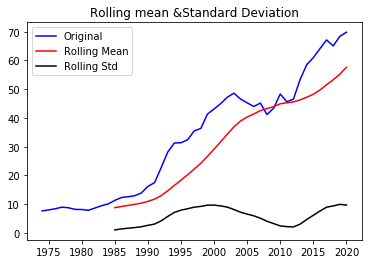

In [7]:
orig=plt.plot(indexedDataset, color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean &Standard Deviation')
plt.show(block=False)

,Value
Date,
1973-12-31,2.035241
1974-12-31,2.083048
1975-12-31,2.129255
1976-12-31,2.194053
1977-12-31,2.171143
1978-12-31,2.103878
1979-12-31,2.098803
1980-12-31,2.065190
1981-12-31,2.161102


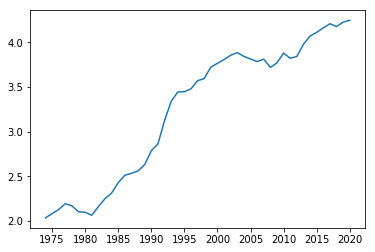

In [8]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
indexedDataset_logScale

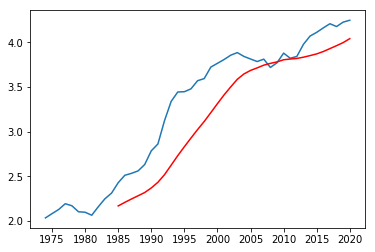

In [9]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [10]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(5)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)

,Value
Date,
1984-12-31,0.259472
1985-12-31,0.302999
1986-12-31,0.286721
1987-12-31,0.278175
1988-12-31,0.312688


In [11]:
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    orig=plt.plot(timeseries, color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean &Standard Deviation')
    plt.show(block=False)
    
    from statsmodels.tsa.stattools import adfuller
    print("Result of Dickey fuller test")
    dftest=adfuller(timeseries['Value'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags used','No of observation'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

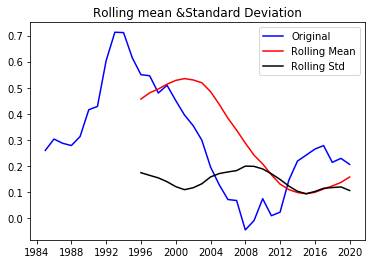

Result of Dickey fuller test
Test Statistics         -1.794351
p-value                  0.383270
#Lags used               3.000000
No of observation       32.000000
Critical Value (1%)     -3.653520
Critical Value (5%)     -2.957219
Critical Value (10%)    -2.617588
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

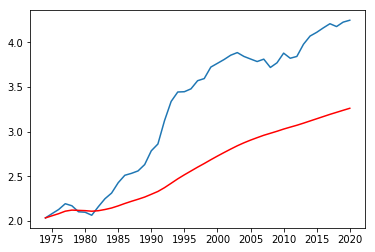

In [13]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=365, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

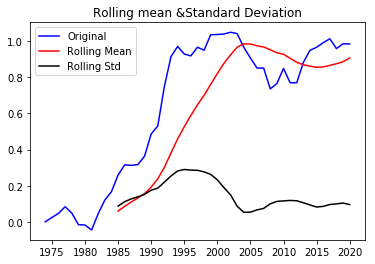

Result of Dickey fuller test
Test Statistics         -1.409841
p-value                  0.577549
#Lags used               1.000000
No of observation       45.000000
Critical Value (1%)     -3.584829
Critical Value (5%)     -2.928299
Critical Value (10%)    -2.602344
dtype: float64


In [14]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

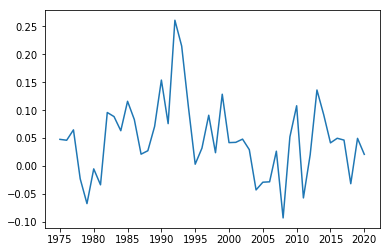

In [15]:
datasetLogDiffShifting=indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

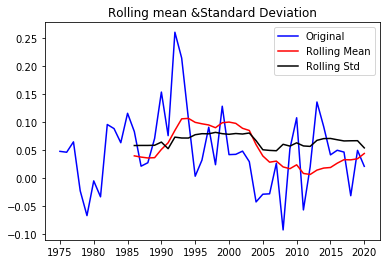

Result of Dickey fuller test
Test Statistics         -4.259779
p-value                  0.000521
#Lags used               0.000000
No of observation       45.000000
Critical Value (1%)     -3.584829
Critical Value (5%)     -2.928299
Critical Value (10%)    -2.602344
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

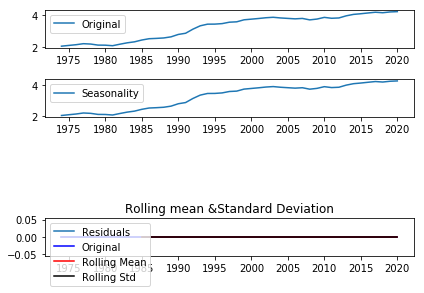

Result of Dickey fuller test
Test Statistics               NaN
p-value                       NaN
#Lags used               0.000000
No of observation       46.000000
Critical Value (1%)     -3.581258
Critical Value (5%)     -2.926785
Critical Value (10%)    -2.601541
dtype: float64


C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)
trend= decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

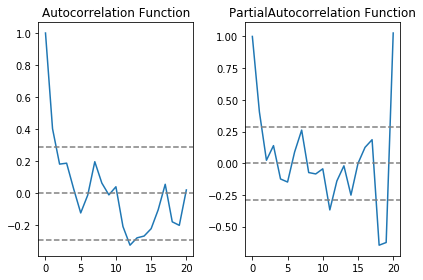

In [18]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('PartialAutocorrelation Function')
plt.tight_layout()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.1751')

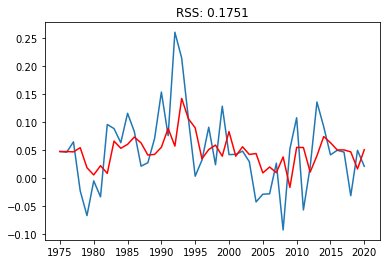

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Value'])**2))

In [20]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
1974-12-31    0.047304
1975-12-31    0.047505
1976-12-31    0.046870
1977-12-31    0.054347
1978-12-31    0.018481
dtype: float64

In [21]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
1974-12-31    0.047304
1975-12-31    0.094809
1976-12-31    0.141679
1977-12-31    0.196025
1978-12-31    0.214507
dtype: float64

In [22]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['Value'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1973-12-31    2.035241
1974-12-31    2.082545
1975-12-31    2.130051
1976-12-31    2.176920
1977-12-31    2.231267
dtype: float64

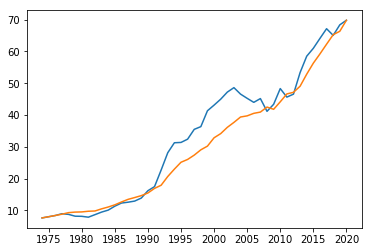

In [30]:
predicitons_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predicitons_ARIMA)


In [24]:
def num_rows(group):
    return len(group)

def num_columns(group):
    return len(group[0])
indexedDataset_logScale


,Value
Date,
1973-12-31,2.035241
1974-12-31,2.083048
1975-12-31,2.129255
1976-12-31,2.194053
1977-12-31,2.171143
1978-12-31,2.103878
1979-12-31,2.098803
1980-12-31,2.065190
1981-12-31,2.161102


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


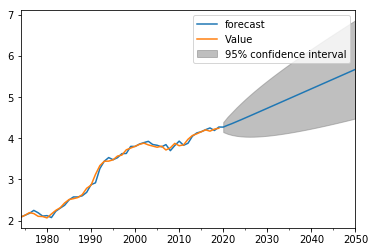

In [25]:
results_ARIMA.plot_predict(1,77)
results=results_ARIMA.forecast(steps=30)

In [26]:
results = results_ARIMA.forecast(steps=30)    
converted_results = [(np.exp(x)) for x in [i for i in results]]


In [27]:
converted_results

[array([ 71.84241552,  75.10045366,  78.22937067,  81.9084331 ,
         85.68255299,  89.78130411,  94.05593158,  98.58868139,
        103.33552367, 108.33086996, 113.56722649, 119.06404773,
        124.82716941, 130.87198295, 137.20976675, 143.85549937,
        150.82326713, 158.12891339, 165.78851163, 173.81928098,
        182.23909677, 191.06682588, 200.32219049, 210.02591125,
        220.19969333, 230.86630816, 242.04962396, 253.7746703 ,
        266.06768717, 278.95618743]),
 array([1.06363361, 1.1121289 , 1.15265764, 1.19186629, 1.22767935,
        1.26164986, 1.29349416, 1.32380124, 1.35265488, 1.38034219,
        1.4069895 , 1.43276092, 1.45776082, 1.48209277, 1.50583405,
        1.5290544 , 1.55181002, 1.57415011, 1.59611598, 1.61774364,
        1.63906409, 1.66010452, 1.68088871, 1.70143772, 1.7217702 ,
        1.74190282, 1.76185051, 1.7816267 , 1.80124356, 1.82071209]),
 array([[ 63.66041549,  81.07601291],
        [ 60.97898228,  92.49216582],
        [ 59.21604583, 103.3

# End of the program